In [2]:
from tictactoe_env import TicTacToe
from tictactoe_debug import TicTacToeGame, QLearningPlayer, RandomPlayer, Trainer, DQNPlayer, DQNet
import numpy as np
from tqdm.notebook import tqdm
from collections import defaultdict
from itertools import product
import torch

%load_ext autoreload
%autoreload 2

In [2]:
env = TicTacToe()
game = TicTacToeGame(env)
rplayer_x = RandomPlayer()
rplayer_o = RandomPlayer()

game.check_rewards(rplayer_x, rplayer_o, n_iter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

{'wins_x': 5929, 'wins_o': 2853, 'draws': 1218, 'missx': 0, 'misso': 0}

In [3]:
trainer = Trainer(game)

## 3x3

In [4]:
qplayer_params = {'eps': 0.3, 'alpha': 0.01, 'gamma': 1}
qplayer_x , qplayer_o = QLearningPlayer(**qplayer_params), QLearningPlayer(**qplayer_params)

In [6]:
trainer.train_table('x', qplayer_x, n_iter=100000)
trainer.train_table('o', qplayer_o, n_iter=100000)

Training QLearningPlayer(eps=0.3, alpha=0.01, gamma=1):   0%|          | 0/100000 [00:00<?, ?it/s]

Training QLearningPlayer(eps=0.3, alpha=0.01, gamma=1):   0%|          | 0/100000 [00:00<?, ?it/s]

In [7]:
game.check_rewards(qplayer_x, qplayer_o)

  0%|          | 0/10000 [00:00<?, ?it/s]

{'wins_x': 0, 'wins_o': 0, 'draws': 10000, 'missx': 0, 'misso': 0}

  0%|          | 0/40 [00:00<?, ?it/s]

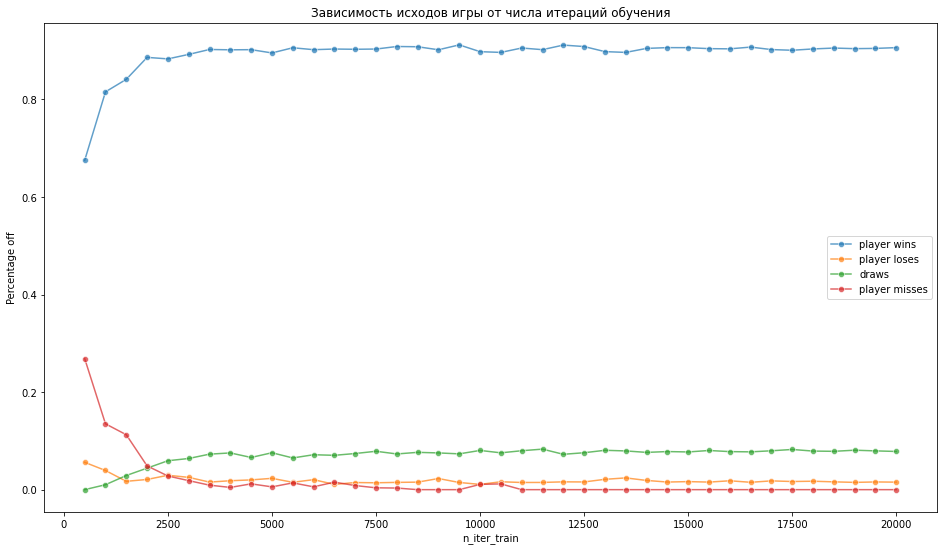

In [8]:
trainer.plot_learning_table('x', qplayer_x, rplayer_o, max_iter=20000, iter_step=500, iter_check=10000)

  0%|          | 0/40 [00:00<?, ?it/s]

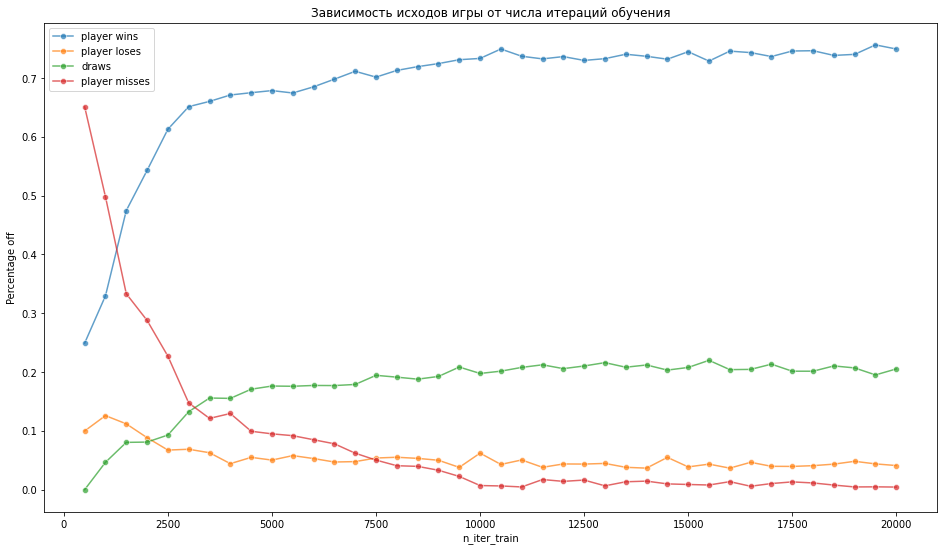

In [9]:
trainer.plot_learning_table('o', qplayer_o, rplayer_x, max_iter=20000, iter_step=500, iter_check=10000)

## 4x4

In [14]:
env = TicTacToe(4, 4)
game = TicTacToeGame(env)

In [15]:
qplayer_params = {'eps': 0.3, 'alpha': 0.01, 'gamma': 1, 'n_rows': 4, 'n_cols': 4}
qplayer_x , qplayer_o = QLearningPlayer(**qplayer_params), QLearningPlayer(**qplayer_params)
rplayer_x, rplayer_o = RandomPlayer(), RandomPlayer()

In [16]:
trainer = Trainer(game)

  0%|          | 0/40 [00:00<?, ?it/s]

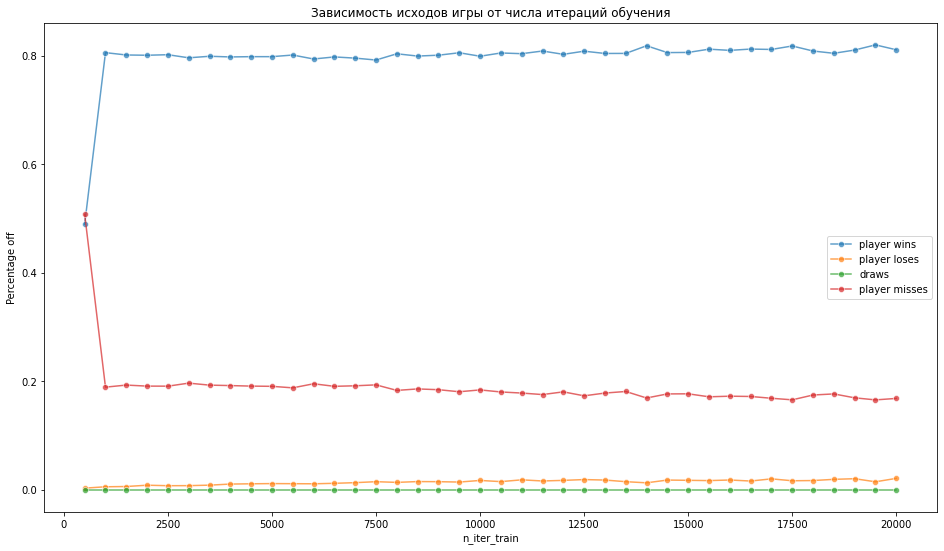

In [17]:
trainer.plot_learning_table('x', qplayer_x, rplayer_o, max_iter=20000, iter_step=500, iter_check=10000)

  0%|          | 0/30 [00:00<?, ?it/s]

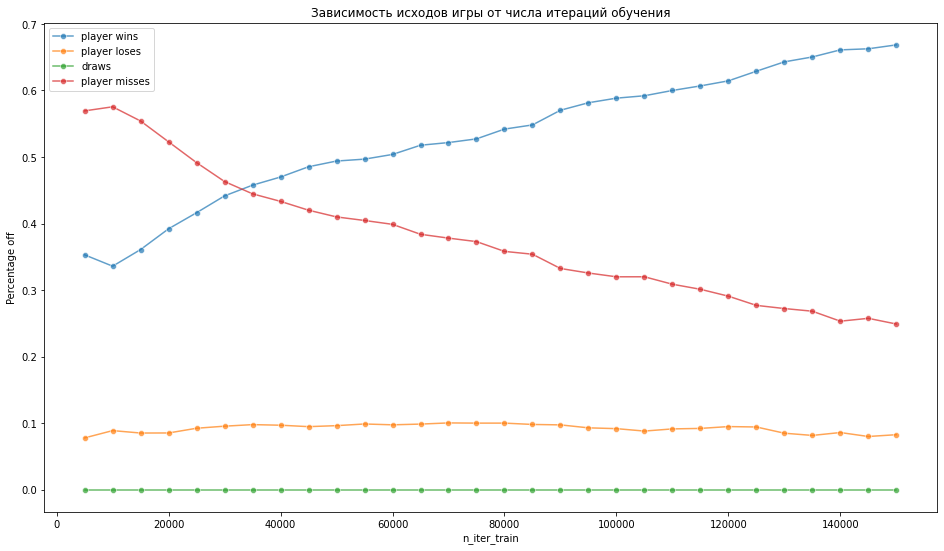

In [18]:
trainer.plot_learning_table('o', qplayer_o, rplayer_x, max_iter=150000, iter_step=5000, iter_check=20000)

## DQN

### 3x3

In [31]:
rplayer = RandomPlayer()
env = TicTacToe(3, 3)
game = TicTacToeGame(env)
trainer = Trainer(game)

In [34]:
model_x = DQNet(hidden_size=256, board_size=(3, 3))
model_o = DQNet(hidden_size=256, board_size=(3, 3))
player_x = DQNPlayer(eps=0.2, alpha=0.01, gamma=0.7, n_rows=3, n_cols=3, model=model_x)
player_o = DQNPlayer(eps=0.2, alpha=0.01, gamma=0.7, n_rows=3, n_cols=3, model=model_o)

  0%|          | 0/20 [00:00<?, ?it/s]

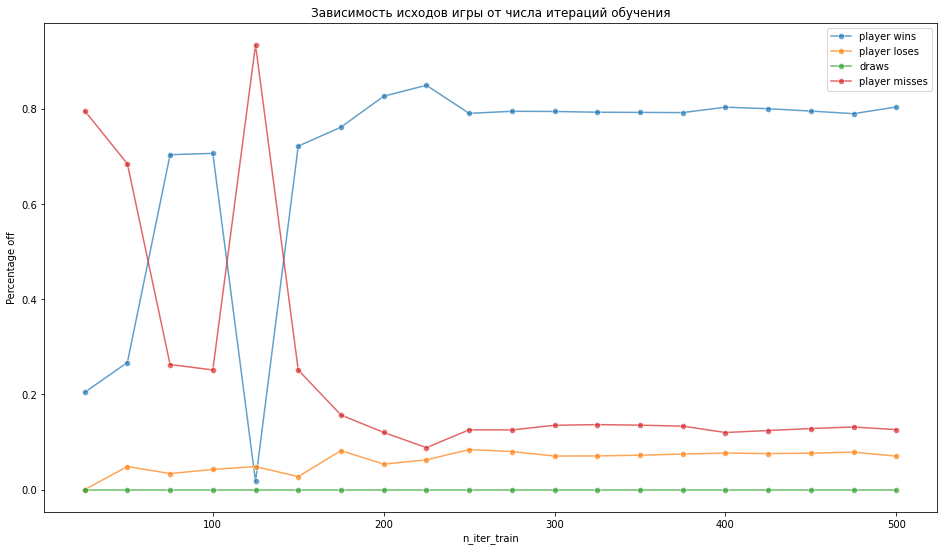

In [36]:
trainer.plot_learning_deep('x', player_x, RandomPlayer(), 500, 25, iter_check=5000)

  0%|          | 0/20 [00:00<?, ?it/s]

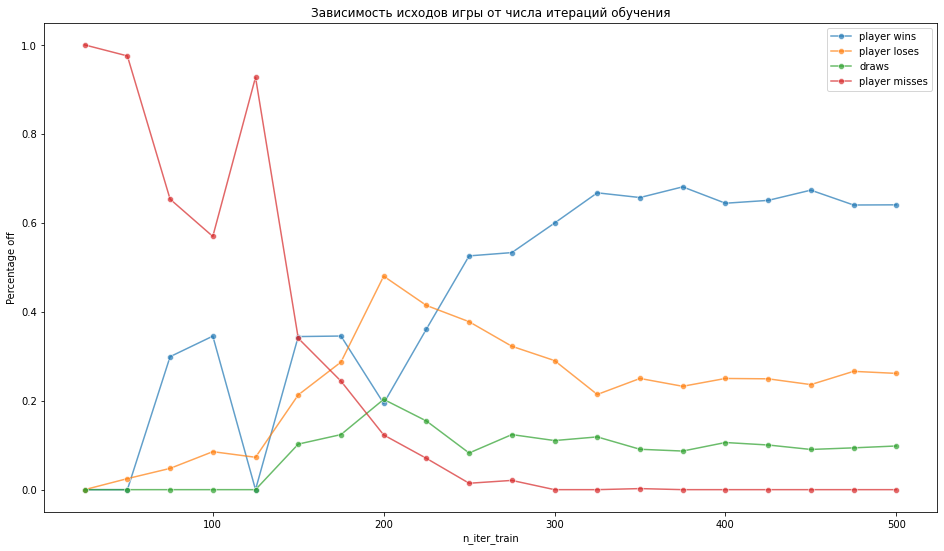

In [37]:
trainer.plot_learning_deep('o', player_o, RandomPlayer(), 500, 25, iter_check=5000)

### 4x4

In [38]:
rplayer = RandomPlayer()
env = TicTacToe(4, 4)
game = TicTacToeGame(env)
trainer = Trainer(game)

In [316]:
player_x = DQNPlayer(eps=0.2, alpha=0.01, gamma=0.7, n_rows=4, n_cols=4)
player_o = DQNPlayer(eps=0.2, alpha=0.01, gamma=0.7, n_rows=4, n_cols=4)

In [317]:
# trainer.train_deep('x', player_x, RandomPlayer(), batch_size=512, epochs=1500)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [318]:
game.check_rewards(player_x, RandomPlayer())

  0%|          | 0/10000 [00:00<?, ?it/s]

{'wins_x': 9979, 'wins_o': 21, 'draws': 0, 'missx': 0, 'misso': 0}

In [319]:
# trainer.train_deep('o', player_o, RandomPlayer(), batch_size=512, epochs=1500)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [320]:
game.check_rewards(RandomPlayer(), player_o)

  0%|          | 0/10000 [00:00<?, ?it/s]

{'wins_x': 814, 'wins_o': 9129, 'draws': 0, 'missx': 0, 'misso': 57}

## Dueling DQN

In [39]:
from tictactoe_debug import DuelingDQNet

In [40]:
rplayer = RandomPlayer()
env = TicTacToe(3, 3)
game = TicTacToeGame(env)
trainer = Trainer(game)

In [41]:
model_x = DuelingDQNet(512, (3, 3))
model_o = DuelingDQNet(512, (3, 3))
player_x = DQNPlayer(eps=0.2, alpha=0.01, gamma=0.7, n_rows=3, n_cols=3, model=model_x)
player_o = DQNPlayer(eps=0.2, alpha=0.01, gamma=0.7, n_rows=3, n_cols=3, model=model_o)

  0%|          | 0/20 [00:00<?, ?it/s]

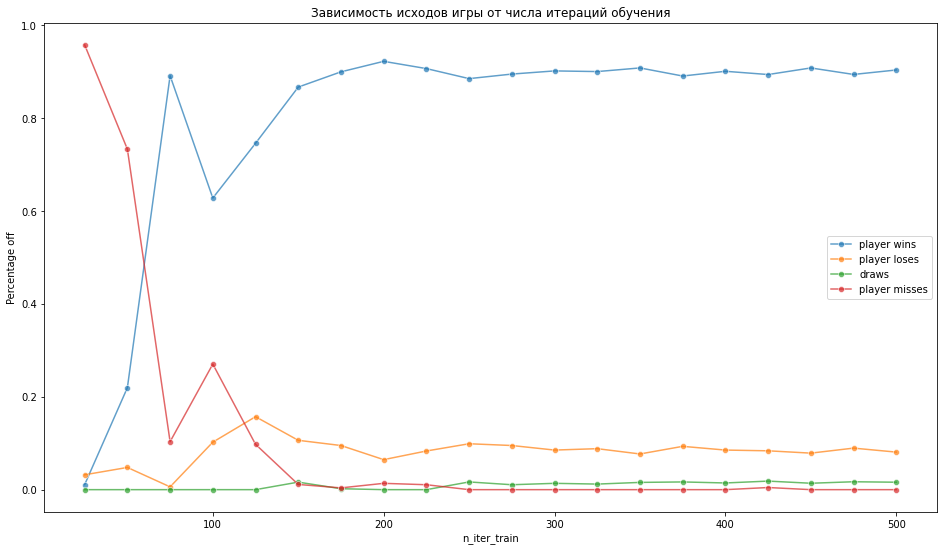

In [42]:
trainer.plot_learning_deep('x', player_x, RandomPlayer(), 500, 25, iter_check=5000)

  0%|          | 0/20 [00:00<?, ?it/s]

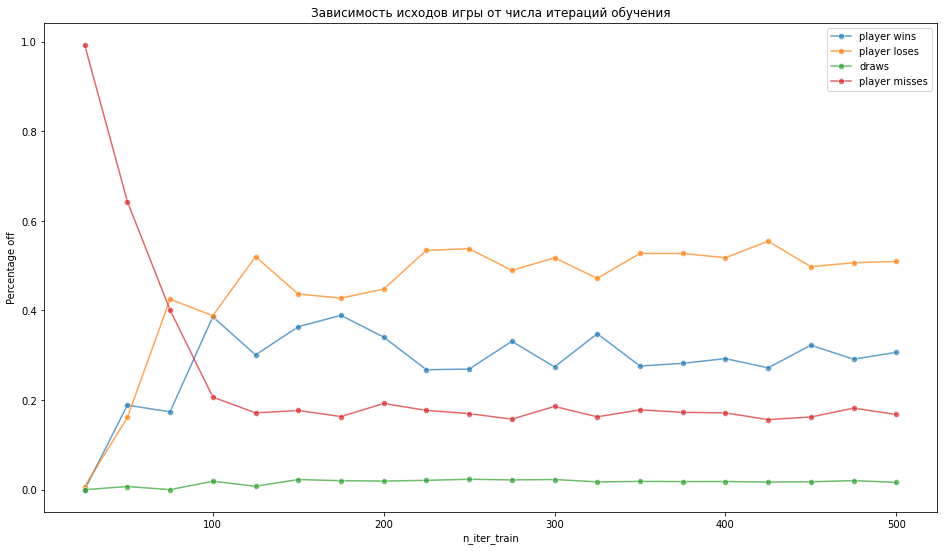

In [43]:
trainer.plot_learning_deep('o', player_o, RandomPlayer(), 500, 25, iter_check=5000)

In [44]:
trainer.train_deep('o', player_o, RandomPlayer(), batch_size=512, epochs=500)

  0%|          | 0/500 [00:00<?, ?it/s]

0.006397833116352558

In [45]:
game.check_rewards(RandomPlayer(), player_o)

  0%|          | 0/10000 [00:00<?, ?it/s]

{'wins_x': 4957, 'wins_o': 3235, 'draws': 189, 'missx': 0, 'misso': 1619}